#### Find the Cycle rider Membertype?
#### The smart cycles are available all over the Chennai city. Rental bicycles available in all major locations in Chennai.We are trying to understand what are the profiles of customers are subscribers?	 Please predict based on certain characteristics of the incoming riders?

### Objective : Please predict subscribers based on certain characteristics of the incoming riders

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bike = pd.read_csv('F:\case studies\ebike.csv')
print(bike.head())

   Duration  Start date  D.O.W.  Hour End Location Bike number  Member type  \
0   1310546  30-06-2020       3    23          NxT      X00577       Member   
1    251568  30-06-2020       3    23          NxT      X00458       Member   
2   1306672  30-06-2020       3    22          NxT      X01557  Pay per use   
3   1345033  30-06-2020       3    22          NxT      T07816  Pay per use   
4   1381830  30-06-2020       3    22          NxT      X00467  Pay per use   

  Gender  
0   Male  
1   Male  
2    NaN  
3    NaN  
4    NaN  


In [373]:
##OUTLIER removal:
def outlier(w,a):
    q1 =  w.quantile(0.25)
    q3 = w.quantile(0.73)
    iqr = q3-q1
    low = q1-(1.5*iqr)
    high = q3 + (1.5*iqr)
    y = np.array(w[(w<low) | (w>high)])
    a[w.isin (y)]=a.median()
    return a

In [374]:
bike

,Duration,Start date,D.O.W.,Hour,End Location,Bike number,Member type,Gender
0,1310546,30-06-2020,3,23,NxT,X00577,Member,Male
1,251568,30-06-2020,3,23,NxT,X00458,Member,Male
2,1306672,30-06-2020,3,22,NxT,X01557,Pay per use,NaN
3,1345033,30-06-2020,3,22,NxT,T07816,Pay per use,NaN
4,1381830,30-06-2020,3,22,NxT,X00467,Pay per use,NaN
...,...,...,...,...,...,...,...,...
22263,739719,04-01-2020,7,12,NxT,N01175,Member,Male
22264,234520,01-01-2020,4,14,Guindy,N01255,Member,Male
22265,1340515,01-01-2020,4,11,Guindy,N01098,Member,Male
22266,374969,01-01-2020,4,11,Guindy,N01185,Member,Male


In [375]:
bike.columns

Index(['Duration', 'Start date', 'D.O.W.', 'Hour', 'End Location',
       'Bike number', 'Member type', 'Gender'],
      dtype='object')

In [376]:
bike

,Duration,Start date,D.O.W.,Hour,End Location,Bike number,Member type,Gender
0,1310546,30-06-2020,3,23,NxT,X00577,Member,Male
1,251568,30-06-2020,3,23,NxT,X00458,Member,Male
2,1306672,30-06-2020,3,22,NxT,X01557,Pay per use,NaN
3,1345033,30-06-2020,3,22,NxT,T07816,Pay per use,NaN
4,1381830,30-06-2020,3,22,NxT,X00467,Pay per use,NaN
...,...,...,...,...,...,...,...,...
22263,739719,04-01-2020,7,12,NxT,N01175,Member,Male
22264,234520,01-01-2020,4,14,Guindy,N01255,Member,Male
22265,1340515,01-01-2020,4,11,Guindy,N01098,Member,Male
22266,374969,01-01-2020,4,11,Guindy,N01185,Member,Male


In [377]:
bike['Gender'] = bike.groupby(['End Location', 'D.O.W.'])['Gender'].apply(lambda x: x.fillna(x.mode()[0]))

In [378]:
bike['Dates'] = pd.to_datetime(bike['Start date']).dt.date
bike['day'] = pd. DatetimeIndex(bike['Dates']). day
bike['month'] = pd. DatetimeIndex(bike['Dates']). month
bike['year'] = pd. DatetimeIndex(bike['Dates']). year
bike.drop(columns='Start date',axis=1,inplace=True)
#df.drop(columns='Time',axis=1,inplace=True)
bike

,Duration,D.O.W.,Hour,End Location,Bike number,Member type,Gender,Dates,day,month,year
0,1310546,3,23,NxT,X00577,Member,Male,2020-06-30,30,6,2020
1,251568,3,23,NxT,X00458,Member,Male,2020-06-30,30,6,2020
2,1306672,3,22,NxT,X01557,Pay per use,Male,2020-06-30,30,6,2020
3,1345033,3,22,NxT,T07816,Pay per use,Male,2020-06-30,30,6,2020
4,1381830,3,22,NxT,X00467,Pay per use,Male,2020-06-30,30,6,2020
...,...,...,...,...,...,...,...,...,...,...,...
22263,739719,7,12,NxT,N01175,Member,Male,2020-04-01,1,4,2020
22264,234520,4,14,Guindy,N01255,Member,Male,2020-01-01,1,1,2020
22265,1340515,4,11,Guindy,N01098,Member,Male,2020-01-01,1,1,2020
22266,374969,4,11,Guindy,N01185,Member,Male,2020-01-01,1,1,2020


## Univariate analysis

### Duration

#### assuming the duration is in seconds// converting it to Days.

In [379]:
bike['Duration']=((bike['Duration']/86400).apply(np.ceil))

In [380]:
bike

,Duration,D.O.W.,Hour,End Location,Bike number,Member type,Gender,Dates,day,month,year
0,16.0,3,23,NxT,X00577,Member,Male,2020-06-30,30,6,2020
1,3.0,3,23,NxT,X00458,Member,Male,2020-06-30,30,6,2020
2,16.0,3,22,NxT,X01557,Pay per use,Male,2020-06-30,30,6,2020
3,16.0,3,22,NxT,T07816,Pay per use,Male,2020-06-30,30,6,2020
4,16.0,3,22,NxT,X00467,Pay per use,Male,2020-06-30,30,6,2020
...,...,...,...,...,...,...,...,...,...,...,...
22263,9.0,7,12,NxT,N01175,Member,Male,2020-04-01,1,4,2020
22264,3.0,4,14,Guindy,N01255,Member,Male,2020-01-01,1,1,2020
22265,16.0,4,11,Guindy,N01098,Member,Male,2020-01-01,1,1,2020
22266,5.0,4,11,Guindy,N01185,Member,Male,2020-01-01,1,1,2020


In [381]:
bike['Duration'].describe()

count    22268.000000
mean         8.893569
std         10.996694
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        598.000000
Name: Duration, dtype: float64

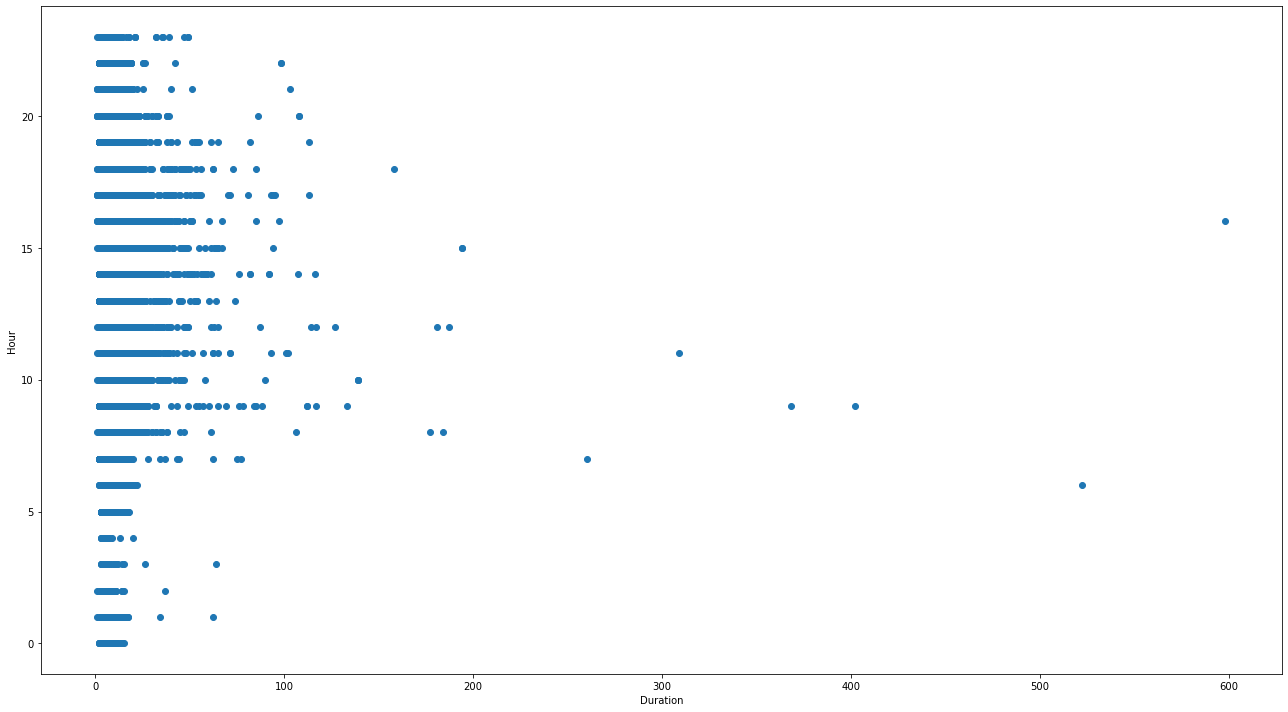

In [382]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bike['Duration'], bike['Hour'])
ax.set_xlabel('Duration')
ax.set_ylabel('Hour')
plt.show()

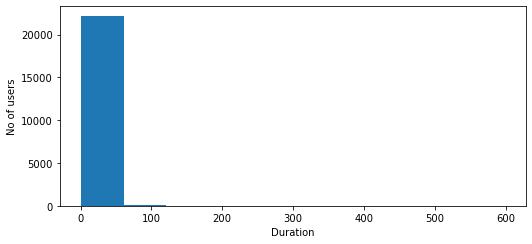

In [383]:
fig=plt.subplot(1,1,1)
plt.hist(bike['Duration'])
fig.set_xlabel('Duration')
fig.set_ylabel('No of users')
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration'>

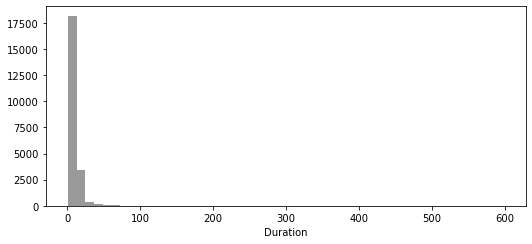

In [384]:
sns.distplot(bike['Duration'],kde=False,color='black',bins= 50)

##### note : Bin size is 500 in the above graph

#### Duration :
#### 1. Duration Variable has many outliers, meaning there are many users who rent the bike for a prolonged number of days
#### 2. Duration and Hours does not make sense together
#### pay per use cannot have a larger duration
#### -------------------------------------------------------------------------------------------------------------------------

### D.O.W. (Day Of Week)

<AxesSubplot:xlabel='D.O.W.', ylabel='count'>

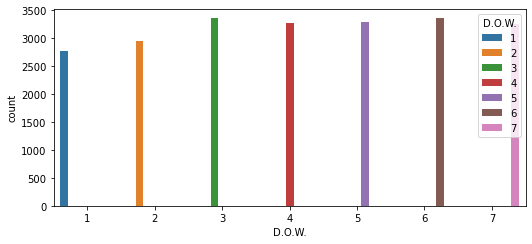

In [385]:
sns.countplot(data=bike,x="D.O.W.",hue=bike['D.O.W.'])

#### Usage gradually increases till third day of the week, and stays the same after.

<AxesSubplot:ylabel='Density'>

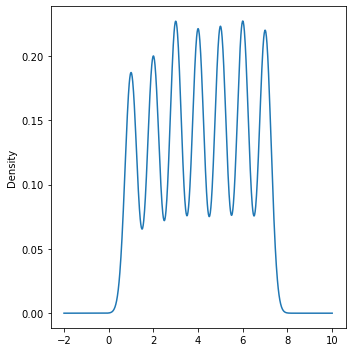

In [386]:
plt.figure(figsize=(5,5))
bike['D.O.W.'].plot(kind='density')

#### D.O.W. :
#### 1.Usage gradually increases till third day of the week, and stays the same after.
#### 2.Usage peaks at 3rd and 6th day
#### -------------------------------------------------------------------------------------------------------------------------

### HOUR

In [387]:
bike['Hour'].describe()

count    22268.000000
mean        12.796300
std          4.407113
min          0.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         23.000000
Name: Hour, dtype: float64

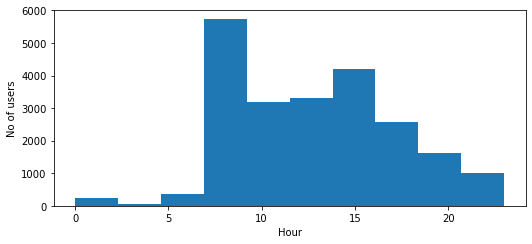

In [388]:
fig=plt.subplot(1,1,1)
plt.hist(bike['Hour'])
fig.set_xlabel('Hour')
fig.set_ylabel('No of users')
plt.show()

#### Most users rent for 9 hours

<AxesSubplot:xlabel='Member type', ylabel='Hour'>

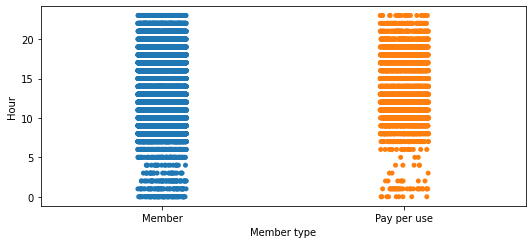

In [389]:
sns.stripplot(x=bike['Member type'],y=bike['Hour'])

#### Hour :
#### 1.Most users rent for 9 hours
#### 2.Non members mostly rent for 6-20 hours, while members rent for all ranges except for 5 hr window.
#### -------------------------------------------------------------------------------------------------------------------------

### End Loaction

<AxesSubplot:xlabel='End Location', ylabel='count'>

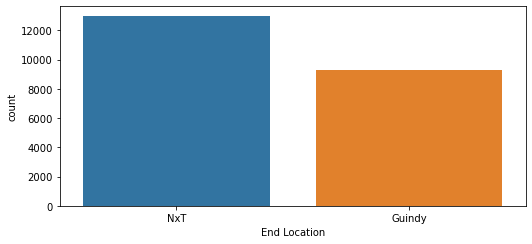

In [390]:
sns.countplot(x = 'End Location',data = bike)

In [391]:
pd.crosstab(index = bike['End Location'],columns="count")

col_0,count
End Location,
Guindy,9283
NxT,12985


#### End Location :
#### Most users end the rental at NxT
#### -------------------------------------------------------------------------------------------------------------------------

### Member type

<AxesSubplot:xlabel='Member type', ylabel='count'>

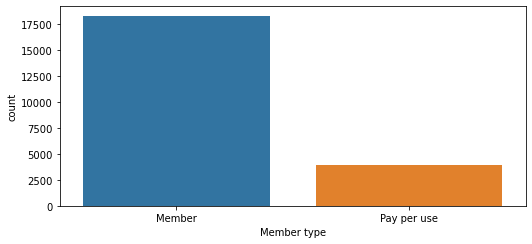

In [392]:
sns.countplot(x = 'Member type',data = bike)

#### Member type :
#### Majority of users are members
#### -------------------------------------------------------------------------------------------------------------------------

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

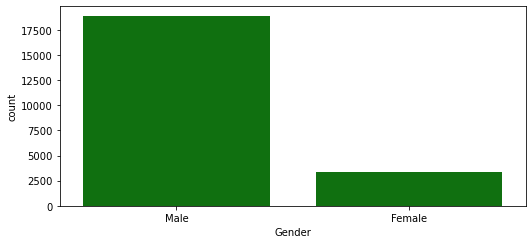

In [393]:
sns.countplot(x = 'Gender',data = bike,color = 'green')

#### Gender :
#### Majority of users are Men
#### -------------------------------------------------------------------------------------------------------------------------

### Date

<AxesSubplot:xlabel='month', ylabel='count'>

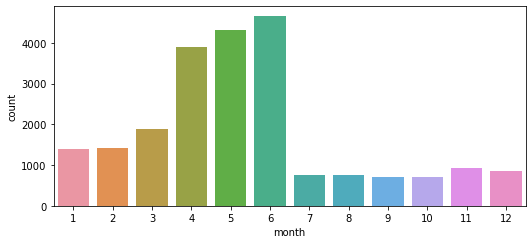

In [394]:
sns.countplot(x = 'month',data = bike)

<AxesSubplot:xlabel='day', ylabel='count'>

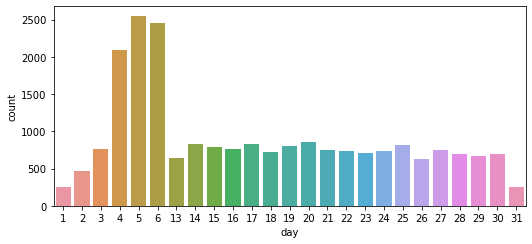

In [395]:
sns.countplot(x = 'day',data = bike)

#### Date :
#### 1. April,May & June are the peak months in the year
#### 2. 4th,5th,and 6th day of the months are the peak usage days of a month
#### -------------------------------------------------------------------------------------------------------------------------

## Bivariate Analysis

### Member type with Other variables

<AxesSubplot:xlabel='D.O.W.', ylabel='count'>

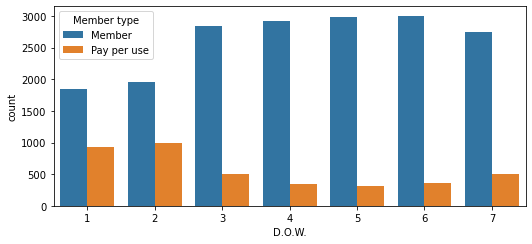

In [396]:
sns.countplot(data=bike,x='D.O.W.',hue='Member type')

#### Majorty of Non members rent at 1st day of week where as members rent at 5th and 6th day of the week.

<AxesSubplot:xlabel='Hour', ylabel='Count'>

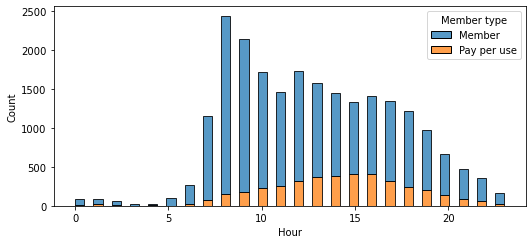

In [397]:
sns.histplot(data=bike,x="Hour",hue='Member type',multiple='stack')

#### Member mostly use for 9 hours, while non members mostly use for 15-16 hours. 

<AxesSubplot:xlabel='month', ylabel='count'>

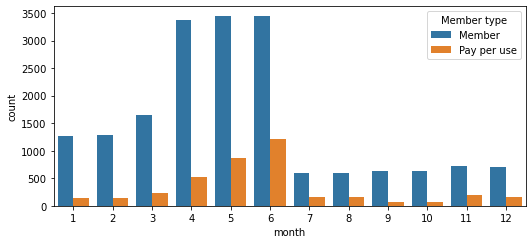

In [398]:
sns.countplot(data=bike,x="month",hue=bike['Member type'])

#### Member peak months - May & June
#### Non member peak month - June

<AxesSubplot:xlabel='End Location', ylabel='count'>

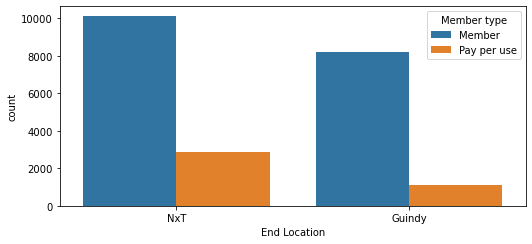

In [399]:
sns.countplot(data=bike,x="End Location",hue=bike['Member type'])

#### Both members and non members end the rental mostly at Nxt

<AxesSubplot:xlabel='day', ylabel='Count'>

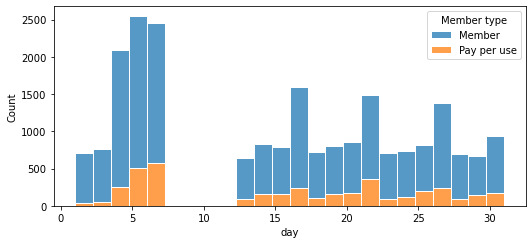

In [400]:
sns.histplot(data=bike,x="day",hue="Member type",multiple='stack',edgecolor='white')

#### Peak usage days of the month for both members and non members is 5 and 6

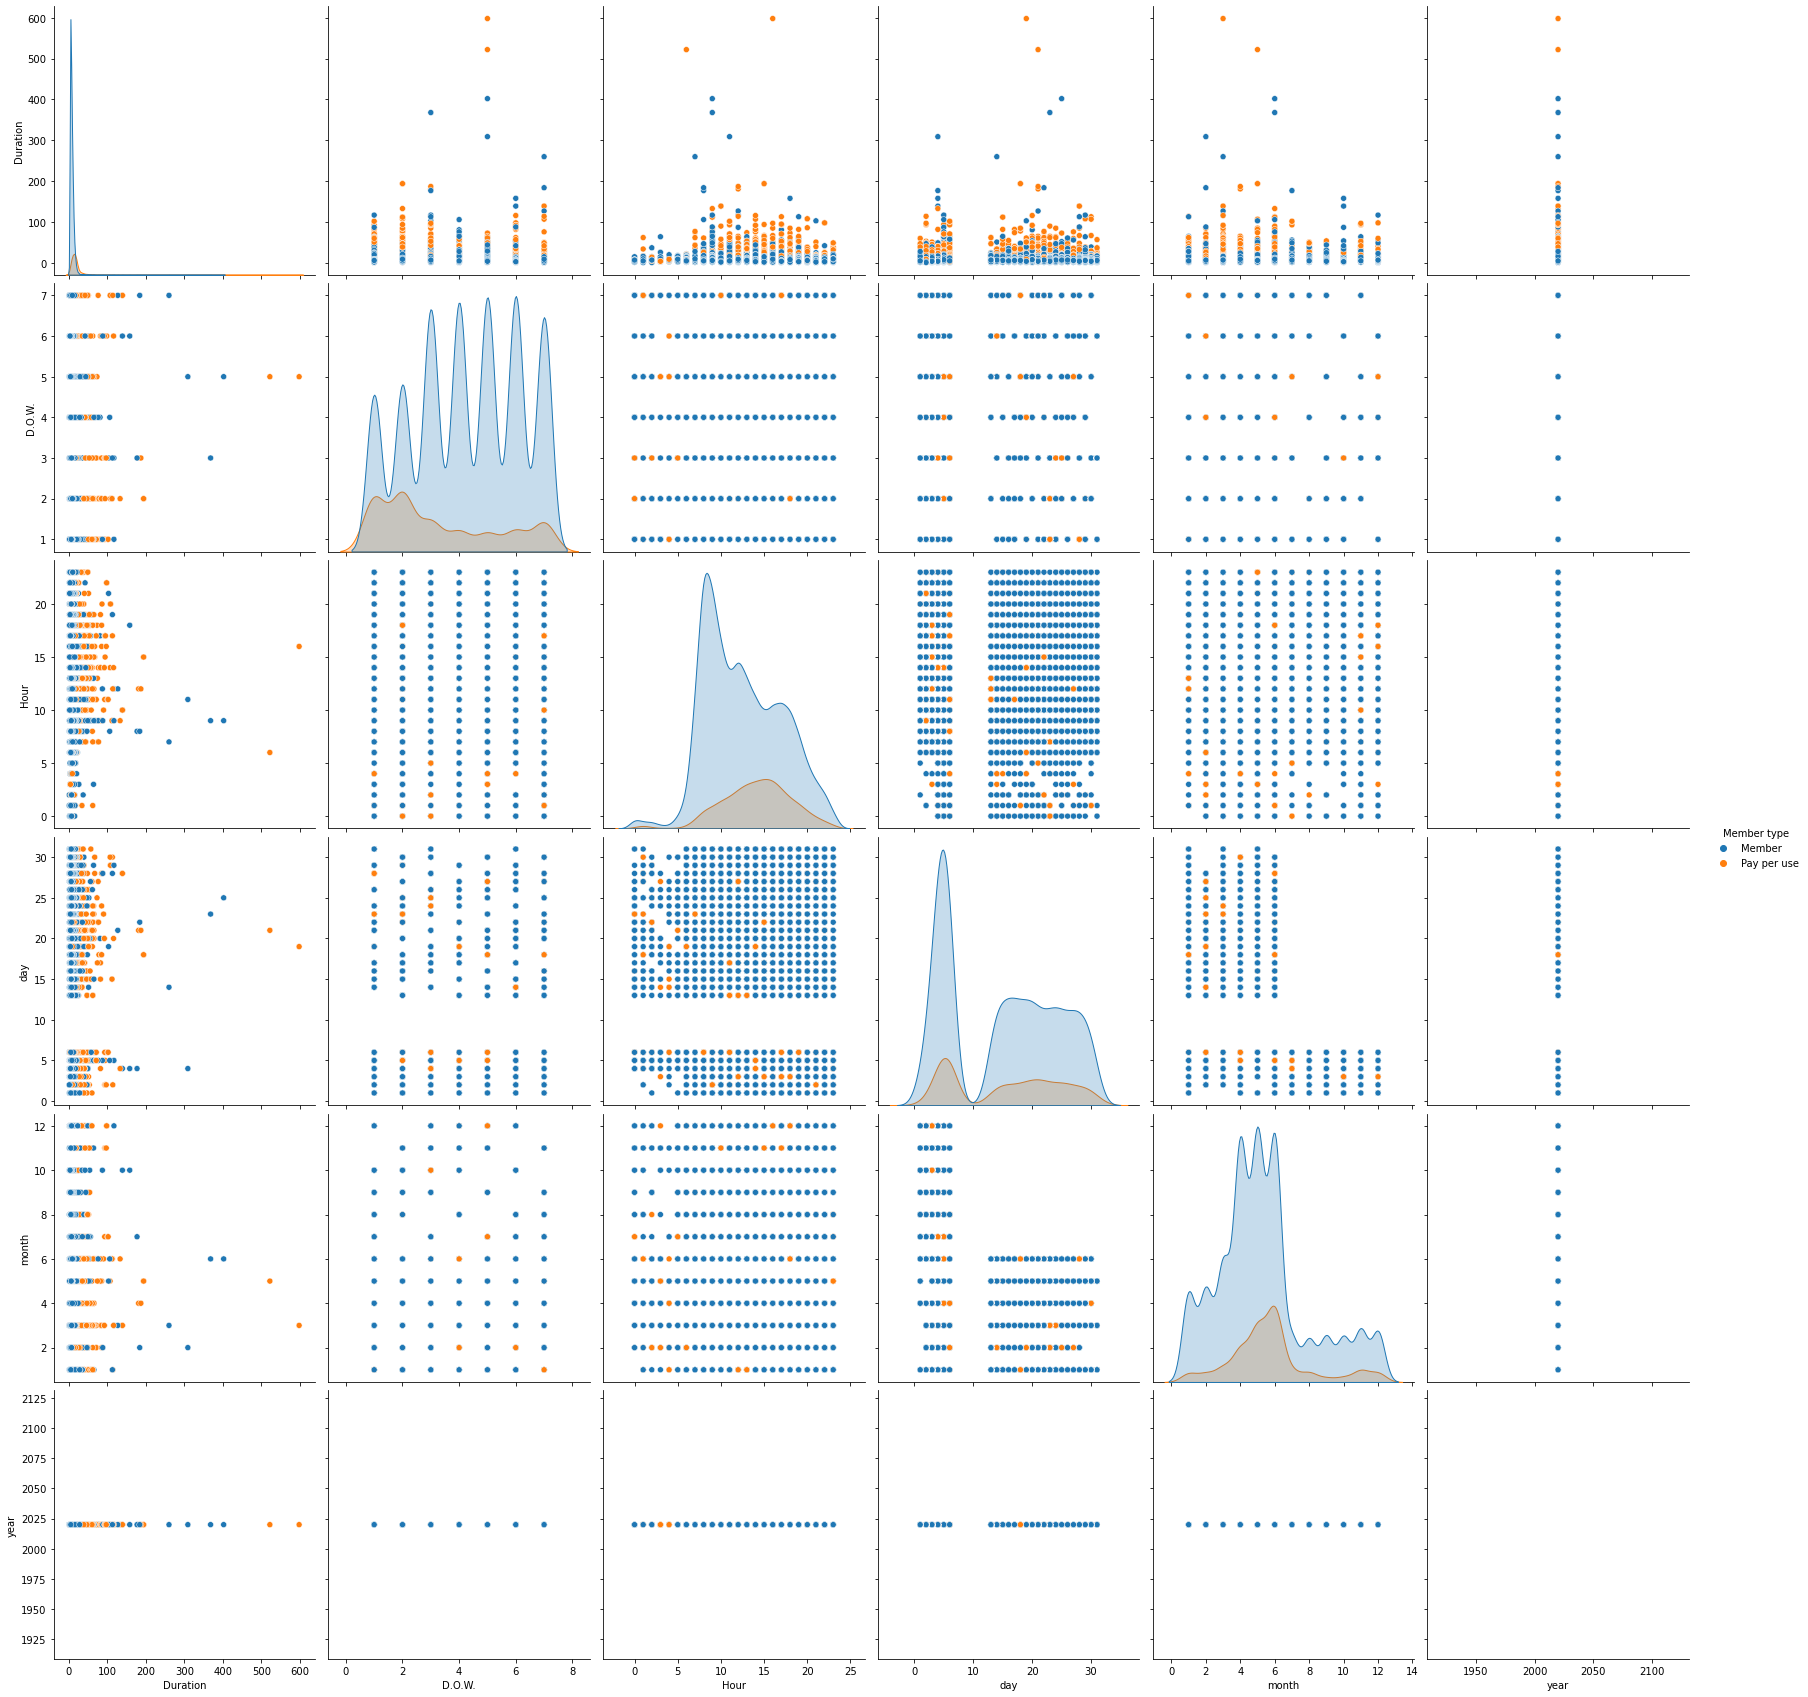

In [401]:
sns.pairplot(bike,hue='Member type', height=4)

#### The Above charts are a Multivariate combination of Member Type with all other variables

### Gender type with Other variables

<AxesSubplot:xlabel='D.O.W.', ylabel='count'>

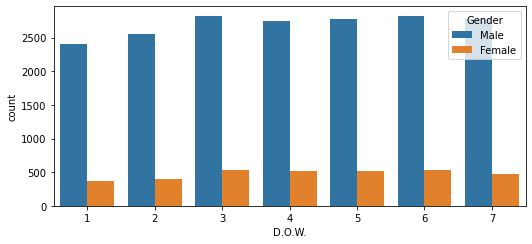

In [402]:
sns.countplot(data=bike,x='D.O.W.',hue='Gender')

#### Most men and women use the bikes at 3rd day of the week

<AxesSubplot:xlabel='Hour', ylabel='Count'>

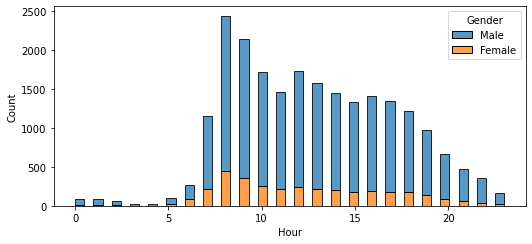

In [403]:
sns.histplot(data=bike,x="Hour",hue='Gender',multiple='stack')

#### Both men and women rent the bikes for similar amount of time.

<AxesSubplot:xlabel='month', ylabel='count'>

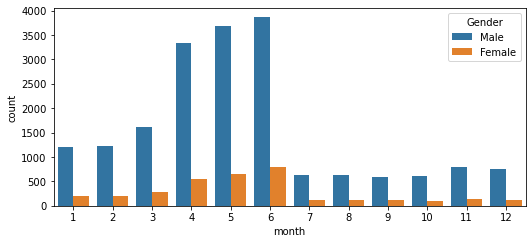

In [404]:
sns.countplot(data=bike,x="month",hue=bike['Gender'])

#### Peak months are gender neutral

<AxesSubplot:xlabel='End Location', ylabel='count'>

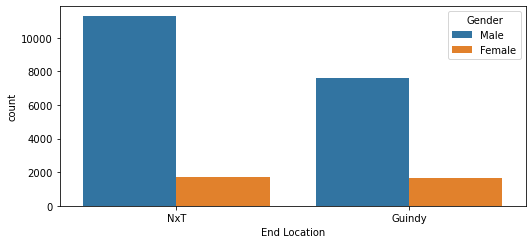

In [405]:
sns.countplot(data=bike,x="End Location",hue=bike['Gender'])

#### Women end the Rental equally on both locations

<AxesSubplot:xlabel='day', ylabel='Count'>

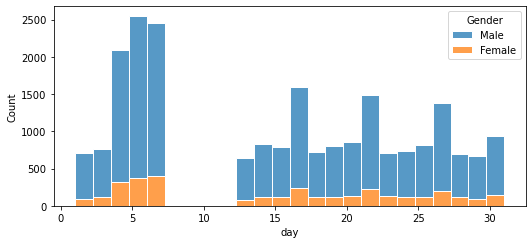

In [406]:
sns.histplot(data=bike,x="day",hue="Gender",multiple='stack',edgecolor='white')

#### Peak Days are also gender neutral
#### -----------------------------------------------------------------------------------------

## Model Building

### Converting categorical variables into bool.

#### End Location : Nxt - 1 / Guindy - 0
#### Gender : Male - 1 / Female - 0
#### Member Type : Member - 0 / Pay per use - 1

In [407]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bike["End Location"]=le.fit_transform(bike["End Location"])
bike["Gender"]=le.fit_transform(bike["Gender"])
bike["Member type"]=le.fit_transform(bike["Member type"])
bike

,Duration,D.O.W.,Hour,End Location,Bike number,Member type,Gender,Dates,day,month,year
0,16.0,3,23,1,X00577,0,1,2020-06-30,30,6,2020
1,3.0,3,23,1,X00458,0,1,2020-06-30,30,6,2020
2,16.0,3,22,1,X01557,1,1,2020-06-30,30,6,2020
3,16.0,3,22,1,T07816,1,1,2020-06-30,30,6,2020
4,16.0,3,22,1,X00467,1,1,2020-06-30,30,6,2020
...,...,...,...,...,...,...,...,...,...,...,...
22263,9.0,7,12,1,N01175,0,1,2020-04-01,1,4,2020
22264,3.0,4,14,0,N01255,0,1,2020-01-01,1,1,2020
22265,16.0,4,11,0,N01098,0,1,2020-01-01,1,1,2020
22266,5.0,4,11,0,N01185,0,1,2020-01-01,1,1,2020


#### Removing Columns that are irrelevant to the model

In [410]:
bike.drop(columns="Bike number",axis=1,inplace=True)
bike.drop(columns="Dates",axis=1,inplace=True)
bike.drop(columns="year",axis=1,inplace=True)
bike

,Duration,D.O.W.,Hour,End Location,Member type,Gender,day,month,year
0,16.0,3,23,1,0,1,30,6,2020
1,3.0,3,23,1,0,1,30,6,2020
2,16.0,3,22,1,1,1,30,6,2020
3,16.0,3,22,1,1,1,30,6,2020
4,16.0,3,22,1,1,1,30,6,2020
...,...,...,...,...,...,...,...,...,...
22263,9.0,7,12,1,0,1,1,4,2020
22264,3.0,4,14,0,0,1,1,1,2020
22265,16.0,4,11,0,0,1,1,1,2020
22266,5.0,4,11,0,0,1,1,1,2020


In [418]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
x = bike[['Duration','D.O.W.','Hour','End Location','Gender','day','month','year']]
y=bike['Member type']
print(x)
print(y)

       Duration  D.O.W.  Hour  End Location  Gender  day  month  year
0          16.0       3    23             1       1   30      6  2020
1           3.0       3    23             1       1   30      6  2020
2          16.0       3    22             1       1   30      6  2020
3          16.0       3    22             1       1   30      6  2020
4          16.0       3    22             1       1   30      6  2020
...         ...     ...   ...           ...     ...  ...    ...   ...
22263       9.0       7    12             1       1    1      4  2020
22264       3.0       4    14             0       1    1      1  2020
22265      16.0       4    11             0       1    1      1  2020
22266       5.0       4    11             0       1    1      1  2020
22267      28.0       4     7             1       1    1      1  2020

[22268 rows x 8 columns]
0        0
1        0
2        1
3        1
4        1
        ..
22263    0
22264    0
22265    0
22266    0
22267    0
Name: Member 

In [424]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
#print('SPLITTED DATASET')
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('SCALING')
#print(X_train)
#print(X_test)
print('-------')
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print('Predicting')
print('Duration - 16.0 | D.O.W. - 3 | Hour - 22 | End Location - 1 |  Gender - 1 | day - 30 | month - 6 | year - 2020 ')
print('Member type : ',classifier.predict(sc.transform([[16.0,3,22,1,1,30,6,2020]])))
print('-------')
print('Predicting the Test set results')

y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.values.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#cm = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix')
#print(cm)
print('ACCURACY SCORE:',accuracy_score(y_test, y_pred))

SCALING
-------
Predicting
Duration - 16.0 | D.O.W. - 3 | Hour - 22 | End Location - 1 |  Gender - 1 | day - 30 | month - 6 | year - 2020 
Member type :  [1]
-------
Predicting the Test set results
ACCURACY SCORE: 0.8638404885934974


## The Model has 86% accuracy

### Key Insights :

#### 1. Usage peaks at 3rd and 6th day,Peak day charges can be implied to generate more revenue.
#### 2. During the months of April, May and June the charges can be increased.
#### 3. First Week of the month can be of higher price for pay per use customers, which can generate more revenue also encourage them to convert to new members
#### 4. Comparitively Most Non members rent the bikes for longer hours and are usually on the 1st day of the week.
#### 5. Most customers who end the rental at NxT are Men